# Assignment 0

Fengdi Li

## 1 Regularization.

In [29]:
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
URL = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 

In [3]:
df.dtypes # data type

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [94]:
df = df.dropna(subset = ['Salary']) # drop missing record
X = df.select_dtypes(include = ['int64']) # numeric variables other than salary
colname = X.columns
y = df['Salary'] #salary

#### 1.1.1. Create a visualization of the coefficient trajectories

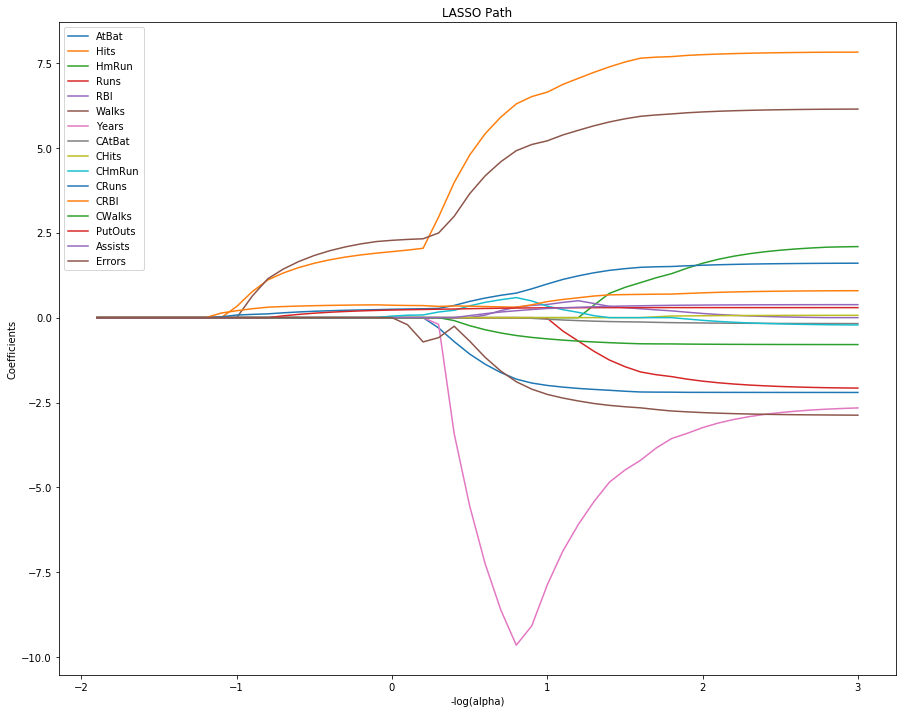

In [164]:
#X = preprocessing.normalize(X)
exp = np.arange(-3, 2, 0.1)
alphas = [10**i for i in exp]
coefs = []
for i in alphas:
    coefs.append(linear_model.Lasso(alpha= i, normalize = True, max_iter=10000).fit(X, y).coef_)
#alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
plt.figure(figsize = (15,12))
alphas = -np.log10(alphas)
plt.plot(alphas, coefs)
plt.xlabel('-log(alpha)')
plt.ylabel('Coefficients')
plt.legend(colname)
#plt.axvline(-1, linestyle='--', color='k')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

#### 1.1.2. Comment on which are the final three predictors that remain in the model

By viewing the graph, the final three predictors are Hits, CRBI, and CRuns or AtBat (cannot tell because both Cruns and AtBat has the same color of line in the graph). When -log(alpha) equals to -1, we can see only three lines have value over zero, so I am checking the coeffcients at alpha equals to 10 as follow: 

In [145]:
coef = linear_model.Lasso(alpha= 10**(1), normalize = True, max_iter=10000).fit(X, y).coef_
colname[abs(coef) != 0]

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')

So 'Hits', 'CRuns', 'CRBI' are the final three predictors that remain in the model.

#### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

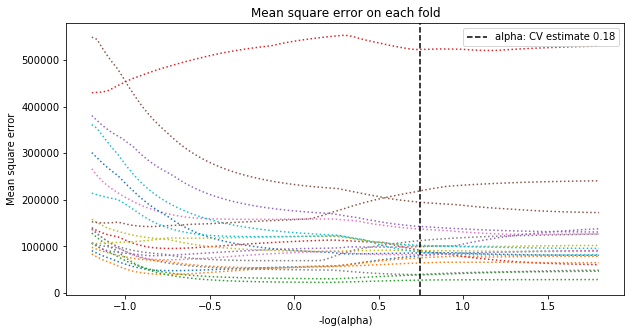

In [149]:
model = linear_model.LassoCV(cv=20, normalize = True).fit(X, y)
# Display results
m_log_alphas = -np.log10(model.alphas_)
plt.figure(figsize = (10, 5))
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate {}'.format(round(model.alpha_, 2)))
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold')
plt.axis('tight')
plt.show()

#### 1.1.4. How many predictors are left in that model?

In [147]:
coef = linear_model.Lasso(alpha= model.alpha_, normalize = True, max_iter=10000).fit(X, y).coef_
print(colname[abs(coef) != 0])
len(colname[abs(coef) != 0])

Index(['AtBat', 'Hits', 'RBI', 'Walks', 'Years', 'CHmRun', 'CRuns', 'CRBI',
       'CWalks', 'PutOuts', 'Assists', 'Errors'],
      dtype='object')


12

There are 12 predictors are left in the model.

### 1.2 Repeat with Ridge Regression. 

#### 1.2.1 Visualize the coefficient trajectories

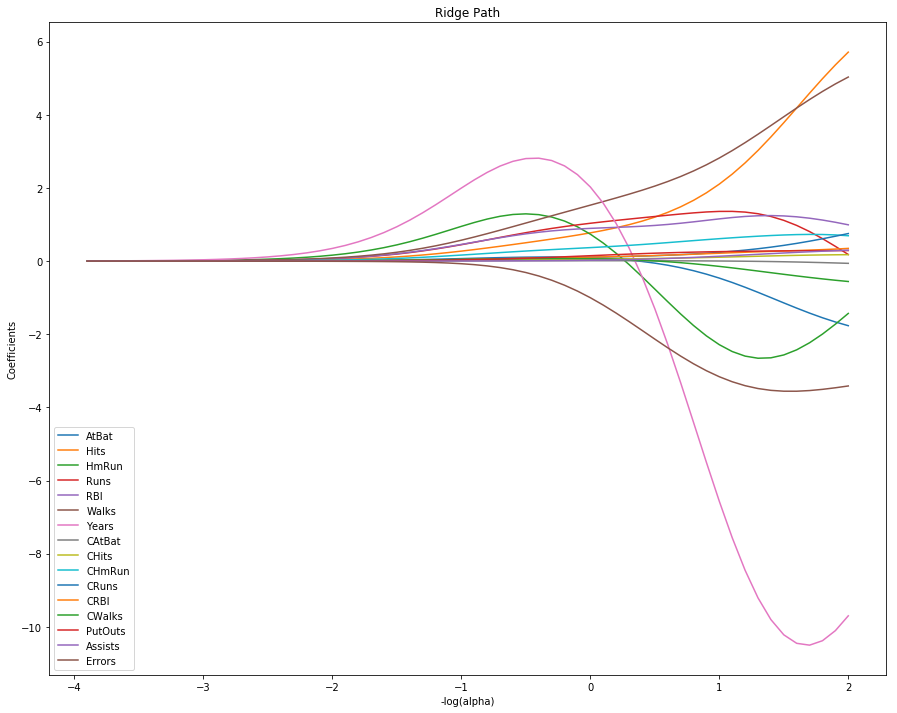

In [156]:
#X = preprocessing.normalize(X)
exp = np.arange(-2, 4, 0.1)
alphas = [10**i for i in exp]
coefs = []
for i in alphas:
    coefs.append(linear_model.Ridge(alpha= i, normalize = True, max_iter=10000).fit(X, y).coef_)
#alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
plt.figure(figsize = (15,12))
alphas = -np.log10(alphas)
plt.plot(alphas, coefs)
plt.xlabel('-log(alpha)')
plt.ylabel('Coefficients')
plt.legend(colname)
#plt.axvline(-1, linestyle='--', color='k')
plt.title('Ridge Path')
plt.axis('tight')
plt.show()

#### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [163]:
model = linear_model.RidgeCV(cv=20, normalize = True).fit(X, y)
print('optimal penalty alpha: ', round(model.alpha_,2))
print('coefficients are: ', linear_model.Ridge(alpha= model.alpha_, normalize = True, max_iter=10000).fit(X, y).coef_)

optimal penalty alpha:  10.0
coefficients are:  [ 0.06992075  0.27415628  0.95104527  0.44967509  0.45725759  0.57280382
  1.99841237  0.00587711  0.02224171  0.16600461  0.04464921  0.04607783
  0.04631512  0.03590157  0.00547233 -0.07035014]


The optimal value of penalty is 10.

## 2 Short Answer. 

### 2.1 Explain in your own words the bias-variance tradeoff

When the model is built to make its predictions in general more closer to correct values in training, where the bias between the predicted value and correct value is small, the model will be more complicated each time, which means the variance of predicted value large depends on training samples. On the contrary, when the model is built to predict generally similar values each time, where the variance is small, the model will be less sensitive to the samples and the predicted values in general will be less closer to correct values, which means the bias is large. That is to say, bias decrease when variance increase, while bias increase when variance decrease. A good model will consider to decrease both bias and variance, so it is a tradeoff when building the model.

### 2.2 What role does regularization play in this tradeoff? 

As stated in previous question, a good model will select a midpoint to decrease both bias and variance, then the regularization is the technique to help solve this problem by penalizing each weights and shrinking the contribution of each features.

### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

The LASSO regression uses L1 regularization technique as penalty on the size of coefficients, it aims to minimize the absolute sum of residual. When the penalty increases, the value of coefficients of each feautures will be shrinked respectively, which can also be considered as a feature selection method as coefficients will be shrinked to zero one by one when penalty increases. 

The ridge regression is a regularization technique that uses L2 regularization to impose a penalty on the size of coefficients, it aims to minimize the the residual sum of squares. When the penalty increases, the value of coefficients of each feautures will be shrinked.